In [8]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [9]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')

import pandas as pd
from prep import filterx
from plot import bar
from utility import generate

In [10]:
fileName = 'filelist_8_31'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [11]:
############################################
# choose chart to analyze
############################################
n = 6

In [12]:
df = filterx.sld(df_og)

In [13]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [14]:
from collections import defaultdict

names = []
paths = []

for i in range(0, len(dups)):
    names.append(dups['Name'].iloc[i])
    paths.append(dups['path'].iloc[i])

s = zip(names, paths)
d = defaultdict(list)
for k, v in s:
    d[k].append(v)

# restructure into new df (pairs) containing only pairs of duplicate paths
df_names = []
df_path1 = []
df_path2 = []
for k, v in d.items():
    if len(v) == 2:
        df_names.append(k)
        df_path1.append(v[0])
        df_path2.append(v[1])
        
path_data = {'name':df_names, 'path1':df_path1, 'path2':df_path2}
pairs = pd.DataFrame(data=path_data)
pairs = pairs.sort_values(['name'])

In [15]:
all_paths = pairs['path1'].append(pairs['path2'])

In [16]:
len(all_paths.unique())

513

In [17]:
all_paths.value_counts()

R:\Doc\SolidWorks\P6144 SFR USA                                                   25
R:\Doc\SolidWorks\P6164 G3 GEMINI TWIN _ POLARIS                                  23
R:\Doc\SolidWorks\HS4973 Kraft Tech Center (Celox)\15'' INSERTER ASSEMBLYS        19
R:\Doc\SolidWorks\HS4975 Nestle Gaffney Celox 9H                                  18
R:\Doc\SolidWorks\MID RANGE CARTONER                                              17
                                                                                  ..
R:\Doc\SolidWorks\SolidWorks Palette\Palette Parts\KIL Stuff\X00 Motor Gearbox     1
R:\Doc\SolidWorks\Current Closers Presentation                                     1
R:\Doc\SolidWorks\P6121 IN-LINE CLOSER                                             1
R:\Doc\SolidWorks\HS4997, QUAKER MAID MEATS, H&F PARTS                             1
R:\Doc\SolidWorks\K23212 Hostess TF ECT625 FHA                                     1
Length: 513, dtype: int64

In [18]:
top_offenders = all_paths.value_counts()[:n].index.tolist()

In [19]:
df_collection = {}
inc = 0
for offender in top_offenders:
    inc += 1
    offender_mates = []
    for i in range(0, len(pairs)):
        if offender == pairs['path1'].iloc[i]:
            mate = pairs['path2'].iloc[i]
            offender_mates.append(mate)
        if offender == pairs['path2'].iloc[i]:
            mate = pairs['path1'].iloc[i]
            offender_mates.append(mate)
    df_mates = pd.Series(offender_mates)
    occurences = df_mates.value_counts().tolist()
    mates = df_mates.value_counts().index.tolist()
    df_collection[inc] = pd.DataFrame({'paths':mates, 'occurences':occurences,})

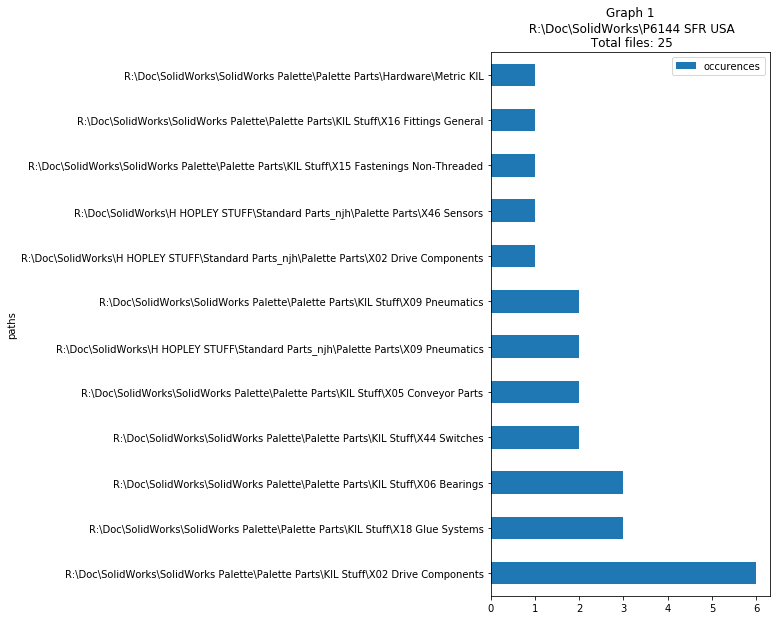

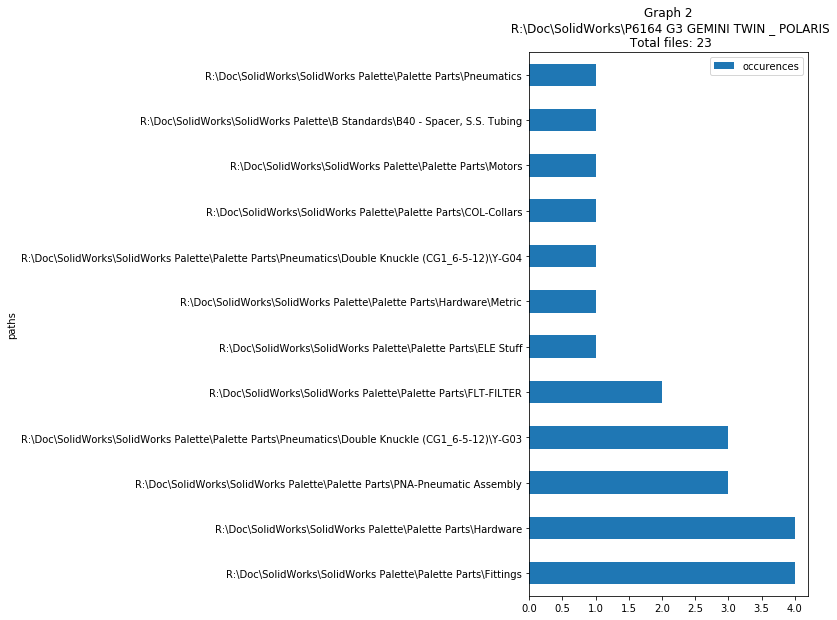

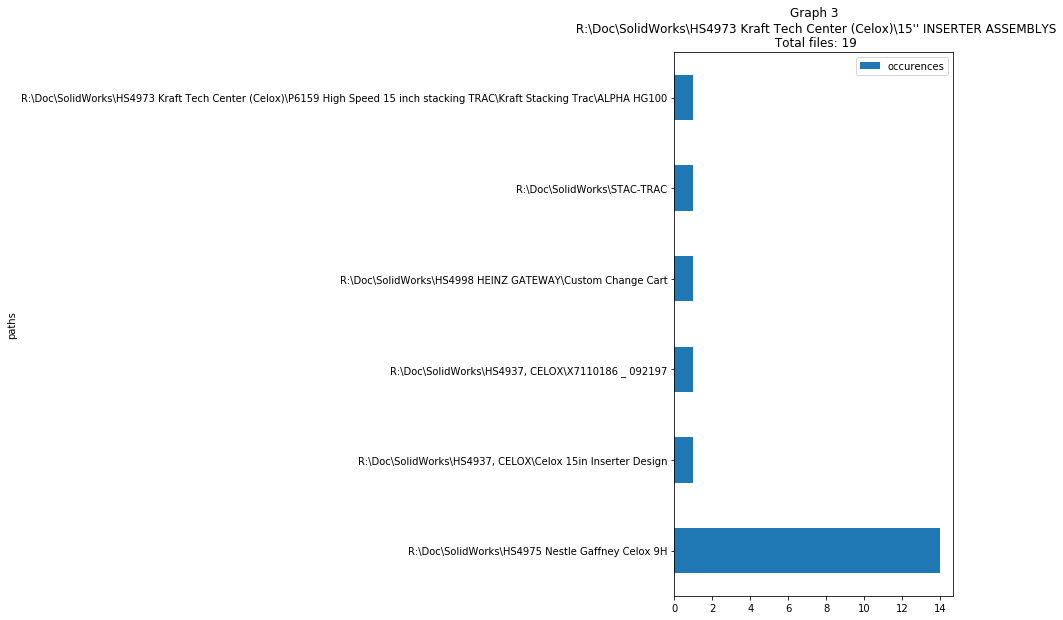

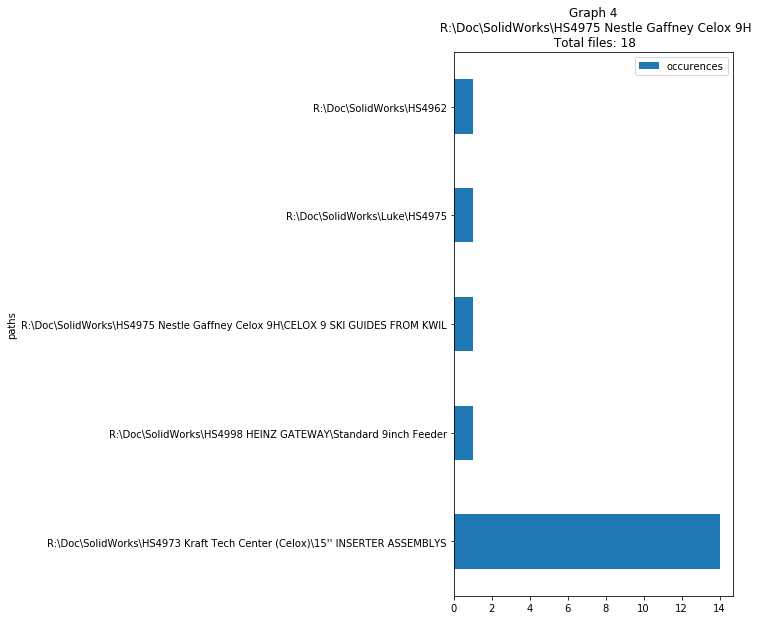

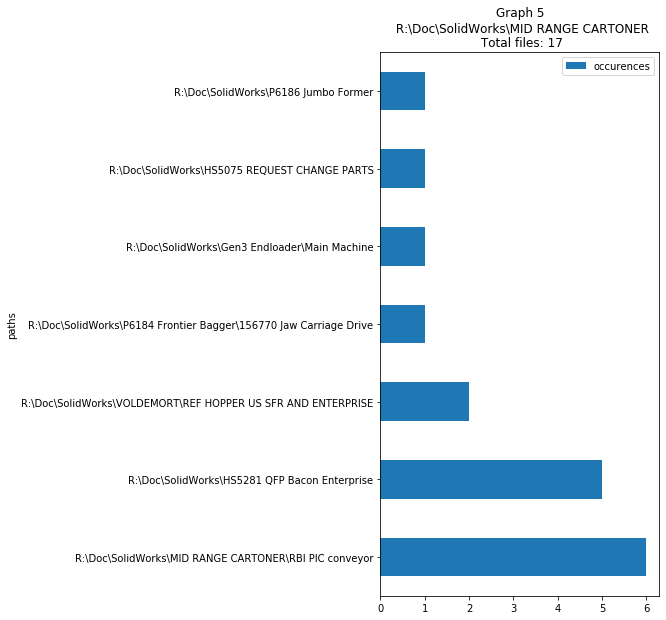

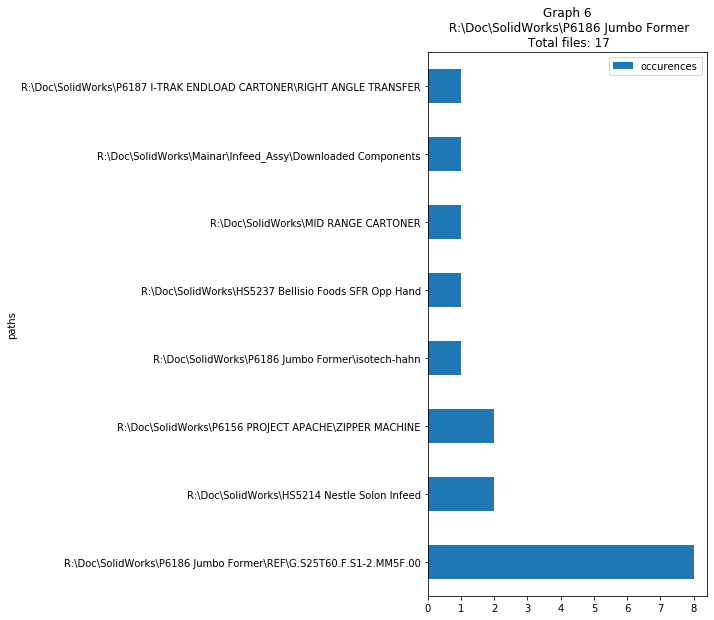

In [20]:
inc = 0
x = 100

for key in df_collection.keys():   
    df_key = df_collection[key]
    indicator = str(inc + 1)
    path = str(top_offenders[inc])
    totalFiles = str(all_paths.value_counts()[inc])   
    if len(df_collection[key]['paths']) <= x:                     
        bar.bar(df_key, indicator, path, totalFiles)                     
    inc += 1
                     

In [21]:
# Primary path
path_1 = top_offenders[len(top_offenders)-1]
print(path_1)

R:\Doc\SolidWorks\P6186 Jumbo Former


In [22]:
# Largest matching path
path_2 = df_collection[n]['paths'].iloc[0]
print(path_2)

R:\Doc\SolidWorks\P6186 Jumbo Former\REF\G.S25T60.F.S1-2.MM5F.00


In [23]:
# Create list of files that exist in both directories
files_to_remove = []
for i in range(len(pairs['path1'])):
    if pairs['path1'][i] == path_1 and pairs['path2'][i] == path_2:
        files_to_remove.append(pairs['name'][i])
    if pairs['path1'][i] == path_2 and pairs['path2'][i] == path_1:
        files_to_remove.append(pairs['name'][i])

In [24]:
# prep dups dataframe do that file sizes can be pulled from it
dups = dups.reset_index(drop=True)
#dups.head()

In [25]:
# create data frame from file list and corresponding file sizes, pulled from dups dataframe
import numpy as np

df_array = []
for i in files_to_remove:
    fname = i.lower()
    index_pair = dups.index[dups['name_low'] == fname].tolist()
    df_row = [fname]
    sizeA = dups['size'].iloc[index_pair[0]]
    sizeB = dups['size'].iloc[index_pair[1]]
    if dups['path'].iloc[index_pair[0]] == path_1:
        df_row.append(sizeA)
        df_row.append(sizeB)
    if dups['path'].iloc[index_pair[0]] == path_2:
        df_row.append(sizeB)
        df_row.append(sizeA)
    df_array.append(df_row)

df_file_size = pd.DataFrame(np.array(df_array), columns=['file', 'size 1', 'size 2'])

In [26]:
# convert file size columns from strings to integers
for i in range(len(df_file_size['size 1'])):
    value1 = df_file_size['size 1'].iloc[i]
    value1 = value1.replace(',','')
    value1 = int(value1)
    df_file_size['size 1'].iloc[i] = value1         
    
for i in range(len(df_file_size['size 2'])):
    value2 = df_file_size['size 2'].iloc[i]
    value2 = value2.replace(',','')
    value2 = int(value2)
    df_file_size['size 2'].iloc[i] = value2

In [27]:
# sort dataframe by file size
df_file_size = df_file_size.sort_values('size 1',ascending=False)
df_file_size = df_file_size.reset_index(drop=True)
df_file_size

,file,size 1,size 2
0,support_s1-2.sldprt,729350,729657
1,lip_s25t60.sldprt,377283,377582
2,support_s1-2.sldasm,268224,268374
3,lip_s25t60.sldasm,210851,212111
4,fitting_mm5f.sldprt,113994,115193
5,fitting_mm5f.sldasm,92074,92710
6,option_00.sldasm,25237,25060
7,bellow_f.sldasm,25072,25385


In [28]:
# generate batch file

# output directory
os.chdir('H:/temp')

path = path_2
# uncomment below to generate output file
# generate.batch(files_to_remove, path)

# change directory back
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')

In [29]:
# generate list for SW duplicate checker

# output directory
os.chdir('H:/temp')
    
# uncomment below to generate output file
generate.list(fileName, d)

# change directory back
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')